In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.cm import ScalarMappable
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling

In [13]:
# Float Tag is the efficiency and this is from 2015
flowtag_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwimrOBShT7hGiW-T9RdLVfg_m58A6BxNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOfEZMT1cgVEFH/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Daily total
dailytotal_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwYTCY6CdT7hGiW-T9RdLVfg_XDEejkXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkd8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# outdoor temperature
outtemp_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwYTCY6CdT7hGiW-T9RdLVfgQXWKITUNy1YUbMPkaT6rPwSVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkd8T1VURE9PUiBURU1QRVJBVFVSRQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# precipitation
prec_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAfQwAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX0xTXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# humitidy
hum_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAgQQAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX01UXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barometric pressure
bar_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAfAwAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX1BUXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Wind Speed
wind_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAewwAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX1NUXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barn sub array 5k 1
Barn_sub5k1_flow_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwQGm0QUVT7hGiW-T9RdLVfgNG0GR81xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA1SyAxfEZMT1cgVEFH/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Barn_sub5k1_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwQGm0QUVT7hGiW-T9RdLVfg3Cno01sXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA1SyAxfERBSUxZIFRPVEFM/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barn sub array 5k 2
Barn_sub5k2_flow_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwly-e90dT7hGiW-T9RdLVfg4yss8c9xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA1SyAyfEZMT1cgVEFH/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Barn_sub5k2_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwly-e90dT7hGiW-T9RdLVfgC2_CZVkXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA1SyAyfERBSUxZIFRPVEFM/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barn sub array 7k 1
Barn_sub7k1_flow_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwYE-MDkhT7hGiW-T9RdLVfgFEs-CMBxNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyAxfEZMT1cgVEFH/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Barn_sub7k1_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwYE-MDkhT7hGiW-T9RdLVfg_A_QnFYXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyAxfERBSUxZIFRPVEFM/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barn sub array 7k 2
Barn_sub7k2_flow_url  = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwI-4zYEhT7hGiW-T9RdLVfgV-qBZsBxNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyAyfEZMT1cgVEFH/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Barn_sub7k2_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwI-4zYEhT7hGiW-T9RdLVfgv65v8lYXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyAyfERBSUxZIFRPVEFM/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barn sub array 7k 3
Barn_sub7k3_flow_url  ='https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwHRyKakhT7hGiW-T9RdLVfgaRg4bMBxNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyAzfEZMT1cgVEFH/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Barn_sub7k3_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwHRyKakhT7hGiW-T9RdLVfggVzW-FYXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyAzfERBSUxZIFRPVEFM/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barn sub array 7k 4
Barn_sub7k4_flow_url  = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwtm4bdkhT7hGiW-T9RdLVfgwmqpcMBxNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyA0fEZMT1cgVEFH/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Barn_sub7k4_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwtm4bdkhT7hGiW-T9RdLVfgKi5H5FYXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEJVUyBCQVJOXFNPTEFSIENPTExFQ1RPUiA3SyA0fERBSUxZIFRPVEFM/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

barn_sub_array_flow_url = [Barn_sub5k1_flow_url,Barn_sub5k2_flow_url,Barn_sub7k1_flow_url,Barn_sub7k2_flow_url,Barn_sub7k3_flow_url,Barn_sub7k4_flow_url]
barn_sub_array_total_url = [Barn_sub5k1_total_url,Barn_sub5k2_total_url,Barn_sub7k1_total_url,Barn_sub7k2_total_url,Barn_sub7k3_total_url,Barn_sub7k4_total_url]

headers = {'user-agent':'Mozilla/5.0'}
username = "iowa\\"
password = ""

response_flowtag = requests.get(flowtag_summary_hourly_url, headers=headers, auth=(username,password))
json_data_flowtag = json.loads(response_flowtag.text)["Items"]

response_dailytotal = requests.get(dailytotal_summary_hourly_url, headers=headers, auth=(username,password))
json_data_dailytotal = json.loads(response_dailytotal.text)["Items"]

response_outtemp = requests.get(outtemp_summary_hourly_url, headers=headers, auth=(username,password))
json_data_outtemp = json.loads(response_outtemp.text)["Items"]

response_prec = requests.get(prec_summary_hourly_url, headers=headers, auth=(username,password))
json_data_prec = json.loads(response_prec.text)["Items"]

response_hum = requests.get(hum_summary_hourly_url, headers=headers, auth=(username,password))
json_data_hum = json.loads(response_hum.text)["Items"]

response_bar = requests.get(bar_summary_hourly_url, headers=headers, auth=(username,password))
json_data_bar = json.loads(response_bar.text)["Items"]

response_wind = requests.get(wind_summary_hourly_url, headers=headers, auth=(username,password))
json_data_wind = json.loads(response_wind.text)["Items"]

json_data_flow = []
json_data_total = []

for i in range(len(barn_sub_array_flow_url)):
  response_flow = requests.get(barn_sub_array_flow_url[i], headers=headers, auth=(username,password))
  json_data_flow.append(json.loads(response_flow.text)["Items"])
  response_total = requests.get(barn_sub_array_total_url[i], headers=headers, auth=(username,password))
  json_data_total.append(json.loads(response_total.text)["Items"])

In [14]:
dni_data_2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNI Data 2018.csv")
dni_data_2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNI Data 2019.csv")
dni_data_2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNI Data 2020.csv")

dni_data = pd.concat([dni_data_2018,dni_data_2019,dni_data_2020], axis=0).reset_index()

# Transform Data

In [16]:
def summary_report(data):
  r, c = data.shape

  print("\nSummary\n")
  print(f"The shape of the dataset is " + str(r) + " rows and " + str(c) + " columns\n")

  for n in data.columns:
    col = data[n]
    print(col.describe())
    print(f"Sparicity is " + str(round(round(col.isna().sum() / r, 2) * 100, 2)) + "%")
    print("\n")

In [17]:
date = []

bsub5k1_flow_tag = []
bsub5k2_flow_tag = []
bsub7k1_flow_tag = []
bsub7k2_flow_tag = []
bsub7k3_flow_tag = []
bsub7k4_flow_tag = []
bsub5k1_total_tag = []
bsub5k2_total_tag = []
bsub7k1_total_tag = []
bsub7k2_total_tag = []
bsub7k3_total_tag = []
bsub7k4_total_tag = []

bus_sub_flow_tag_data= []
bus_sub_total_data=[]

for i in range(len(json_data_flow[0])):
  date.append(json_data_flow[0][i]["Value"]["Timestamp"])
  bsub5k1_flow_tag.append(json_data_flow[0][i]["Value"]["Value"])
  bsub5k2_flow_tag.append(json_data_flow[1][i]["Value"]["Value"])
  bsub7k1_flow_tag.append(json_data_flow[2][i]["Value"]["Value"])
  bsub7k2_flow_tag.append(json_data_flow[3][i]["Value"]["Value"])
  bsub7k3_flow_tag.append(json_data_flow[4][i]["Value"]["Value"])
  bsub7k4_flow_tag.append(json_data_flow[5][i]["Value"]["Value"])
  bsub5k1_total_tag.append(json_data_total[0][i]["Value"]["Value"])
  bsub5k2_total_tag.append(json_data_total[1][i]["Value"]["Value"])
  bsub7k1_total_tag.append(json_data_total[2][i]["Value"]["Value"])
  bsub7k2_total_tag.append(json_data_total[3][i]["Value"]["Value"])
  bsub7k3_total_tag.append(json_data_total[4][i]["Value"]["Value"])
  bsub7k4_total_tag.append(json_data_total[5][i]["Value"]["Value"])

date = pd.to_datetime(date)
bsub5k1_flow = pd.Series(bsub5k1_flow_tag)
bsub5k2_flow = pd.Series(bsub5k2_flow_tag)
bsub7k1_flow = pd.Series(bsub7k1_flow_tag)
bsub7k2_flow = pd.Series(bsub7k2_flow_tag)
bsub7k3_flow = pd.Series(bsub7k3_flow_tag)
bsub7k4_flow = pd.Series(bsub7k4_flow_tag)
bsub5k1_total = pd.Series(bsub5k1_total_tag)
bsub5k2_total = pd.Series(bsub5k2_total_tag)
bsub7k1_total = pd.Series(bsub7k1_total_tag)
bsub7k2_total = pd.Series(bsub7k2_total_tag)
bsub7k3_total = pd.Series(bsub7k3_total_tag)
bsub7k4_total = pd.Series(bsub7k4_total_tag)

bsub_flow = [bsub5k1_flow,bsub5k2_flow,bsub7k1_flow,bsub7k2_flow,bsub7k3_flow,bsub7k4_flow]
bsub_total=[bsub5k1_total,bsub5k2_total,bsub7k1_total,bsub7k2_total,bsub7k3_total,bsub7k4_total]

date = pd.Series(date.tz_localize(None))

##  Datetime

In [18]:
date_col = ["Year","Month","Day","Hour","Minute"]

date_csv = []

for i in range(len(dni_data)):
  date_csv.append(f'{dni_data["Year"][i]}-{dni_data["Month"][i]}-{dni_data["Day"][i]}-{dni_data["Hour"][i]}')

dni_data.drop(columns=date_col, inplace=True)
dni_data["Date"] = pd.to_datetime(date_csv, format="%Y-%m-%d-%H").tz_localize(None)

In [20]:
date = []
flowtag = []
dailytotal = []
outtemp = []
prec = []
hum = []
bar = []
wind = []
data = []

for i in range(len(json_data_flowtag)):
  date.append(json_data_flowtag[i]["Value"]["Timestamp"])
  flowtag.append(json_data_flowtag[i]["Value"]["Value"])
  dailytotal.append(json_data_dailytotal[i]["Value"]["Value"])
  outtemp.append(json_data_outtemp[i]["Value"]["Value"])
  prec.append(json_data_prec[i]["Value"]["Value"])
  hum.append(json_data_hum[i]["Value"]["Value"])
  bar.append(json_data_bar[i]["Value"]["Value"])
  wind.append(json_data_wind[i]["Value"]["Value"])

print(len(flowtag))
date = pd.to_datetime(date)
flowtag = pd.Series(flowtag)
dailytotal = pd.Series(dailytotal)
outtemp = pd.Series(outtemp)
prec = pd.Series(prec)
hum = pd.Series(hum)
bar = pd.Series(bar)
wind = pd.Series(wind)

date = pd.Series(date.tz_localize(None))

26303


## Create Dataframe

In [21]:
df = pd.concat([date,flowtag,dailytotal,outtemp,prec,hum,bar,wind,dni_data.drop(columns={"Date","index"})], axis=1)

## Eliminating Outliers

In [22]:
# Create a sorted DataFrame and rename columns
columns={0:"Timestamp",1:"Flow Tag",2:"Daily Total",3:"Outdoor Temperature",4:"Precipitation",5:"Humidity",6:"Barometric Pressure",7:"Wind Speed"}
df = df.sort_values(0, ascending=True).rename(columns=columns).set_index("Timestamp")

In [23]:
period = 100

#Calculate flow tag delta
df["Flow Tag Delta"] = df["Flow Tag"].diff()

#Calculate 20-ma and std dev
df["Moving Average"] = df["Flow Tag"].rolling(period).mean()
df["Standard Deviation"] = df["Flow Tag"].rolling(period).std()

#Calculate bollinger bands using std dev
df["Upper Bolinger Band"] = df["Moving Average"] + (2 * df["Standard Deviation"])

<ipython-input-24-797162861fc8>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{"Moving Average","Upper Bolinger Band"}].plot()


<Axes: xlabel='Timestamp'>

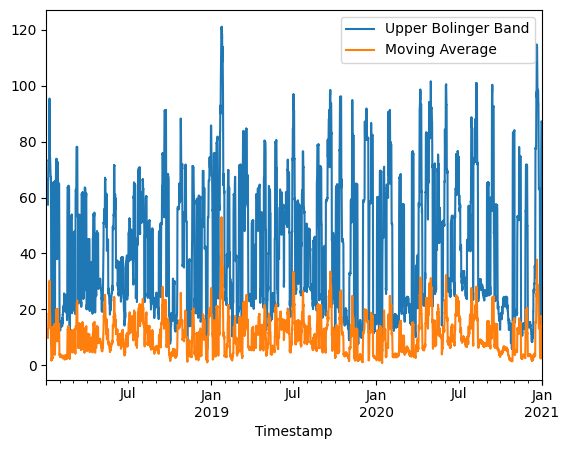

In [24]:
df[{"Moving Average","Upper Bolinger Band"}].plot()

In [25]:
for i in range(len(df)):
  if (df["Moving Average"][i]):
    if (df["Flow Tag"][i] > df["Upper Bolinger Band"][i]):
      df["Flow Tag"][i] = df["Moving Average"][i]

<ipython-input-26-a94fc80bb1ef>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{"Flow Tag","Moving Average"}].plot()


<Axes: xlabel='Timestamp'>

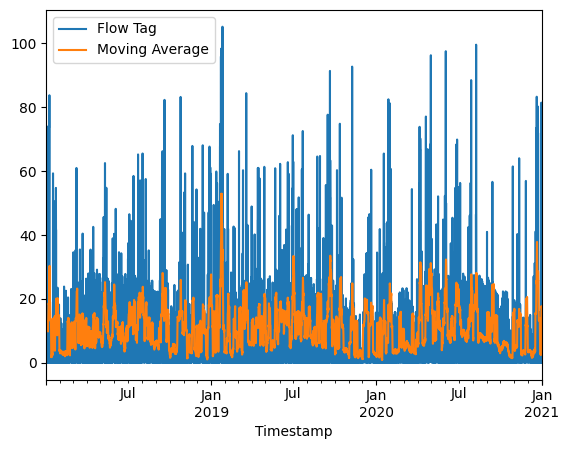

In [26]:
df[{"Flow Tag","Moving Average"}].plot()

In [27]:
# Drop outliers from the data
df = df[df["Flow Tag"] < 38]
len(df)

25467

In [28]:
# Drop 0 values
df = df[df['Flow Tag'] > 0]
len(df)

20088

In [29]:
# drop Null values
# temp fix
df["Daily Total"] = pd.to_numeric(df["Daily Total"], errors="coerce")
df.dropna(inplace=True)
len(df)

18843

# Plotting

## Subarrays

Text(0, 0.5, 'KW')

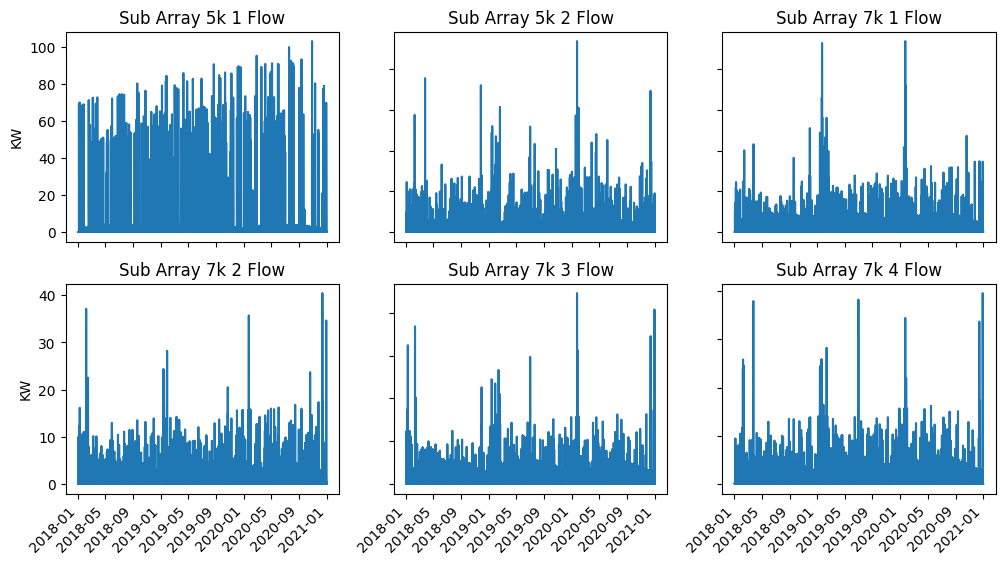

In [32]:
fig, ax = plt.subplots(2,3,figsize=(12,6))
x = np.asarray(date,dtype='datetime64[s]')
for i in range(6):
  if i==0 or 6-i>=4:
    ax[0,i].plot(x,bsub_flow[i])
    if(i<2):
      ax[0,i].set_title('Sub Array 5k {i} Flow'.format(i=str(i+1)))
    else:
      ax[0,i].set_title('Sub Array 7k {i} Flow'.format(i=str(i-1)))
  else:
    ax[1,i-3].plot(x,bsub_flow[i])
    ax[1,i-3].set_title('Sub Array 7k {i} Flow'.format(i=str(i-1)))
    ax[1,i-3].tick_params(axis='x', labelrotation=45)
    for label in ax[1,i-3].get_xticklabels():
      label.set_horizontalalignment('right')

for axs in ax.flat:
  axs.label_outer()

ax[0,0].set_ylabel("KW")
ax[1,0].set_ylabel('KW')

<Axes: xlabel='Timestamp'>

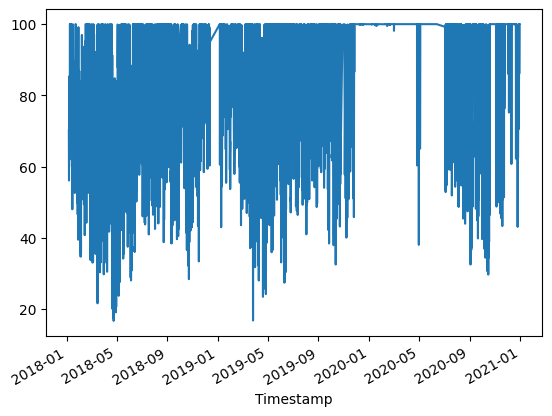

In [30]:
df["Humidity"].plot()

<Axes: xlabel='Timestamp'>

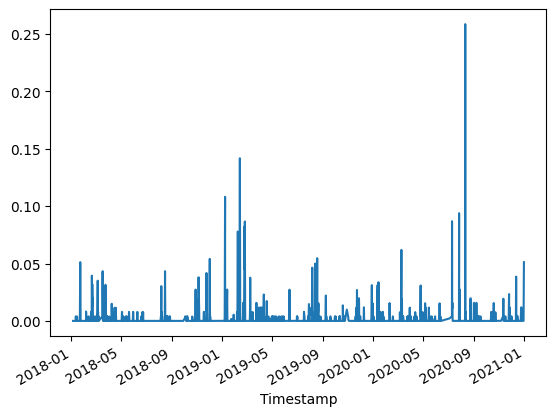

In [31]:
df["Precipitation"].plot()

<Axes: xlabel='Timestamp'>

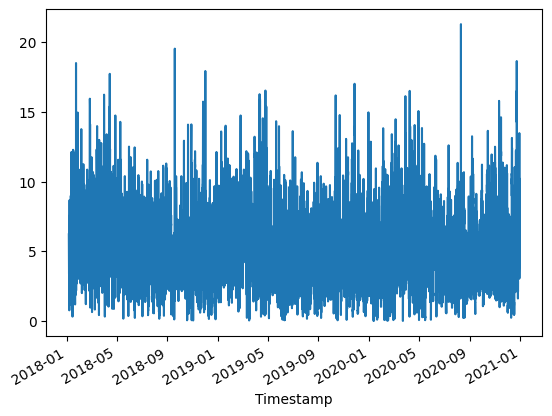

In [101]:
df["Wind Speed"].plot()

## Heatmap Correlation

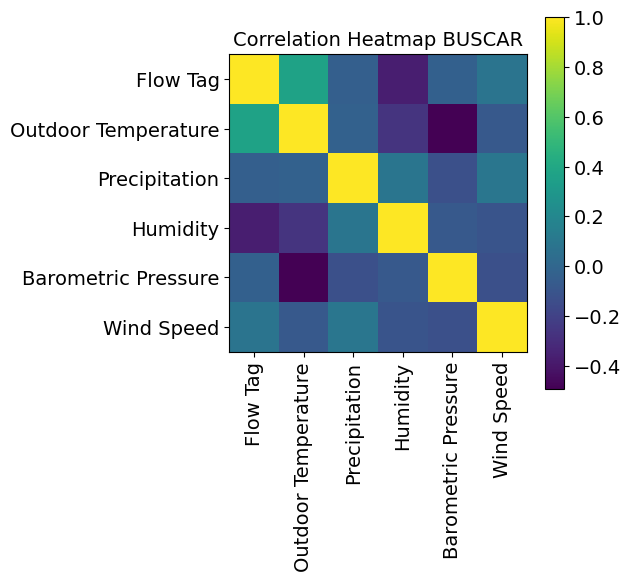

In [40]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Correlation Heatmap BUSCAR", fontsize=14)
    plt.show()


show_heatmap(df[["Flow Tag","Outdoor Temperature","Precipitation","Humidity","Barometric Pressure","Wind Speed"]])

# Model Building

In [126]:
df_train1 = df[:16000]
df_test1 = df[16000:]

In [127]:
target_train1 = df_train1["Flow Tag"]
data_train1 = df_train1.drop(columns={"Flow Tag"})

target_test1 = df_test1["Flow Tag"]
data_test1 = df_test1.drop(columns={"Flow Tag"})

## Ridge Model

In [128]:
data_train1["Daily Total"].isna().sum()

0

In [129]:
ridge1 = linear_model.RidgeCV()

In [130]:
ridge1.fit(data_train1,target_train1)

RidgeCV()

In [131]:
test_pred = ridge1.predict(data_test1)

In [132]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 38.03


In [133]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.34


## Bayes

In [134]:
bayes1 = linear_model.BayesianRidge()

In [135]:
bayes1.fit(data_train1,target_train1)

BayesianRidge()

In [136]:
test_pred = bayes1.predict(data_test1)

In [137]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 38.08


In [138]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.34


## Random Forest Regressor

In [139]:
rf1 = ensemble.RandomForestRegressor()

In [140]:
rf1.fit(data_train1,target_train1)

RandomForestRegressor()

In [141]:
test_pred = rf1.predict(data_test1)

In [142]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 18.59


In [143]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.68


## Descision Tree

In [144]:
tree1 = tree.DecisionTreeRegressor()

In [145]:
tree1.fit(data_train1,target_train1)

DecisionTreeRegressor()

In [146]:
test_pred = tree1.predict(data_test1)

In [147]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 35.43


In [148]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.38


# Cut Features

In [149]:
columns = {"Daily Total","Clearsky DNI","Barometric Pressure"}
df_cut = df.drop(columns=columns)
df_cut.isna().sum()

Flow Tag               0
Outdoor Temperature    0
Precipitation          0
Humidity               0
Wind Speed             0
DNI                    0
Flow Tag Delta         0
Moving Average         0
Standard Deviation     0
Upper Bolinger Band    0
dtype: int64

In [150]:
df_train2 = df_cut[:16000]
df_test2 = df_cut[16000:]

In [152]:
target_train2 = df_train2["Flow Tag"]
data_train2 = df_train2.drop(columns={"Flow Tag"})

target_test2 = df_test2["Flow Tag"]
data_test2 = df_test2.drop(columns={"Flow Tag"})

## Ridge

In [153]:
ridge2 = linear_model.RidgeCV()

In [154]:
ridge2.fit(data_train2,target_train2)

RidgeCV()

In [155]:
test_pred = ridge2.predict(data_test2)

In [156]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 40.61


In [157]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.29


## Bayes

In [158]:
bayes2 = linear_model.BayesianRidge()

In [159]:
bayes2.fit(data_train2,target_train2)

BayesianRidge()

In [160]:
test_pred = bayes2.predict(data_test2)

In [161]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 40.58


In [162]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.29


## Random Forest Regressor

In [163]:
rf2 = ensemble.RandomForestRegressor()

In [164]:
rf2.fit(data_train2,target_train2)

RandomForestRegressor()

In [165]:
test_pred = rf2.predict(data_test2)

In [166]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 30.31


In [167]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.47


## Descision Tree Classifier

In [168]:
tree2 = tree.DecisionTreeRegressor()

In [169]:
tree2.fit(data_train2,target_train2)

DecisionTreeRegressor()

In [170]:
test_pred = tree2.predict(data_test2)

In [171]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 56.21


In [172]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.02
